# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observations
1. Temperature is warmest at the Earth's equator, and stays relatively warm as you travel south.  However, as you travel north of the equator, temperature gets increasingly frigid.
2. Humidity, Cloudiness, and Wind Speed seem to be relatively unaffected by latitude.  That is, the scatter plots show a high degree of randomization.  Wind Speed does seem to have some abnormally high outliers at the far northern latitudes.
3. Weather conditions appear to have ahigher degree of predictability in the Northern Hemisphere as opposed to the Southern Hemisphere.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Request Weather Data on each city in list cities
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="
city_name = []
city_lat = []
city_lon = []
city_temp = []
city_humidity = []
city_wind_speed = []
city_cloudiness = []

#Use try/except code to skip broken url's

for city in cities:
    try:
        query_url = base_url + weather_api_key + "&q=" + city
        weather_response = requests.get(query_url).json()
        city_name.append(weather_response["name"])
        city_lat.append(weather_response["coord"]["lat"])
        city_lon.append(weather_response["coord"]["lon"])
        city_temp.append(weather_response["main"]["temp"])
        city_humidity.append(weather_response["main"]["humidity"])
        city_wind_speed.append(weather_response["wind"]["speed"])
        city_cloudiness.append(weather_response["clouds"]["all"])
        print(f"Retrieving {city} weather data")
    except:
        print(f"City not found.  Skipping and going to next city.")
    pass

    



Retrieving wittmund weather data
Retrieving bluff weather data
Retrieving qiongshan weather data
Retrieving tura weather data
Retrieving rikitea weather data
City not found.  Skipping and going to next city.
Retrieving myitkyina weather data
Retrieving busselton weather data
Retrieving cherskiy weather data
Retrieving kingaroy weather data
Retrieving fukue weather data
Retrieving east london weather data
Retrieving hobart weather data
Retrieving ponta do sol weather data
Retrieving lawrence weather data
Retrieving san quintin weather data
Retrieving salalah weather data
Retrieving ostrovnoy weather data
Retrieving clyde river weather data
Retrieving cape town weather data
Retrieving avarua weather data
Retrieving upernavik weather data
Retrieving chuy weather data
Retrieving lorengau weather data
Retrieving bandarbeyla weather data
City not found.  Skipping and going to next city.
Retrieving alta floresta weather data
Retrieving youkounkoun weather data
Retrieving castro weather data
C

Retrieving olafsvik weather data
Retrieving mitsamiouli weather data
Retrieving wonthaggi weather data
Retrieving quchan weather data
Retrieving westport weather data
Retrieving kavieng weather data
Retrieving geraldton weather data
City not found.  Skipping and going to next city.
Retrieving lazaro cardenas weather data
Retrieving esmeralda weather data
Retrieving iqaluit weather data
Retrieving pasighat weather data
Retrieving muroto weather data
Retrieving bourail weather data
Retrieving margate weather data
Retrieving mahibadhoo weather data
Retrieving nichinan weather data
Retrieving tuatapere weather data
Retrieving kletskaya weather data
Retrieving new norfolk weather data
Retrieving new glasgow weather data
Retrieving babati weather data
Retrieving hit weather data
Retrieving hirara weather data
Retrieving roura weather data
Retrieving carnarvon weather data
Retrieving taoudenni weather data
Retrieving aktau weather data
Retrieving khatanga weather data
Retrieving cienfuegos we

Retrieving ust-nera weather data
Retrieving umm lajj weather data
Retrieving mama weather data
Retrieving nishihara weather data
Retrieving bolitoc weather data
Retrieving kenai weather data
Retrieving phetchaburi weather data
City not found.  Skipping and going to next city.
Retrieving bondo weather data
Retrieving rock sound weather data
Retrieving toamasina weather data
Retrieving poum weather data
Retrieving canala weather data
Retrieving chapais weather data
Retrieving bilibino weather data
Retrieving daru weather data
Retrieving shurugwi weather data
Retrieving maniitsoq weather data
Retrieving channel-port aux basques weather data
Retrieving vostok weather data
Retrieving callaway weather data
Retrieving rotenburg weather data
Retrieving mayo weather data
Retrieving bonavista weather data
Retrieving naze weather data
Retrieving lishui weather data
City not found.  Skipping and going to next city.
Retrieving tsiroanomandidy weather data
Retrieving ewa beach weather data
Retrievin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Convert City Weather Data into Dictionary
city_dict = {
    "City Name": city_name,
    "Latitude": city_lat,
    "Longitude": city_lon,
    "Temperature": city_temp,
    "Humidity": city_humidity,
    "Wind Speed": city_wind_speed,
    "Cloudiness": city_cloudiness
            }

In [5]:
#Convert City Dictionary into a Dataframe
city_df = pd.DataFrame(city_dict)
city_df.head()

,City Name,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Wittmund,53.57,7.78,43.59,93,5.82,75
1,Bluff,-46.60,168.33,50.00,93,8.81,48
2,Qiongshan,20.01,110.35,62.60,93,8.95,90
3,Tura,25.52,90.22,59.02,54,1.72,0
4,Rikitea,-23.12,-134.97,77.38,71,9.33,0


In [6]:
#Save City Dataframe as a CSV File in output_data directory
city_df.to_csv("output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Check for cities with Humidity over 100%
humid_check_df = city_df[city_df["Humidity"] > 100]
len(humid_check_df)

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

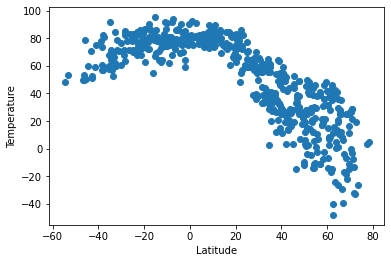

In [9]:
#Plot City Latitude vs. City Temperature and Save as PNG File
plt.scatter(city_df["Latitude"], city_df["Temperature"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("output_data/latitude_temperature.png")
plt.show()

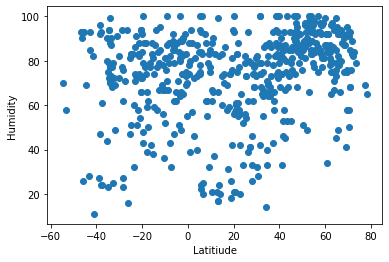

In [11]:
#Plot City Latitude vs. City Humidity and save as PNG File
plt.scatter(city_df["Latitude"], city_df["Humidity"], marker = "o")
plt.xlabel("Latitiude")
plt.ylabel("Humidity")
plt.savefig("output_data/latitude_humidity.png")
plt.show()

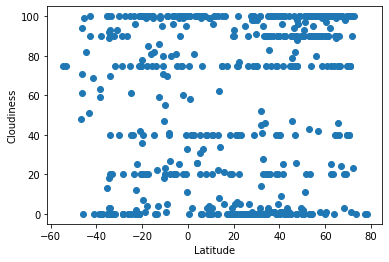

In [13]:
#Plot City Latitude vs. City Cloudiness and save as PNG File
plt.scatter(city_df["Latitude"], city_df["Cloudiness"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("output_data/latitude_cloudiness.png")
plt.show()

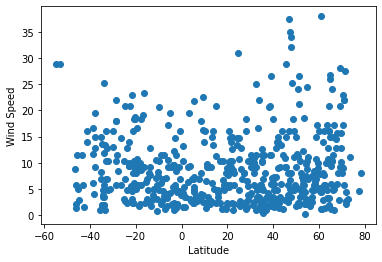

In [15]:
#Plot City Latitude vs. City Windspeed and save as PNG File
plt.scatter(city_df["Latitude"], city_df["Wind Speed"], marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("output_data/latitude_windspeed.png")
plt.show()

Linear Regression

In [16]:
#Create Northern Hemisphere Dataframe
northern_df = city_df[city_df["Latitude"] >= 0]
northern_df.head()

,City Name,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Wittmund,53.57,7.78,43.59,93,5.82,75
2,Qiongshan,20.01,110.35,62.60,93,8.95,90
3,Tura,25.52,90.22,59.02,54,1.72,0
5,Myitkyina,25.38,97.40,58.91,73,2.59,0
7,Cherskiy,68.75,161.30,-22.22,87,2.95,98


In [17]:
#Create Southern Hemisphere Dataframe
southern_df = city_df[city_df["Latitude"] < 0]
southern_df.head()

,City Name,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
1,Bluff,-46.60,168.33,50.00,93,8.81,48
4,Rikitea,-23.12,-134.97,77.38,71,9.33,0
6,Busselton,-33.65,115.33,52.39,87,13.31,0
8,Kingaroy,-26.53,151.83,71.60,94,5.82,90
10,East London,-33.02,27.91,69.80,77,6.93,20


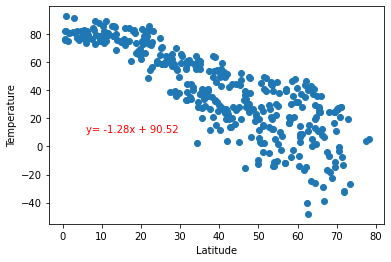

In [18]:
#Northern Hemisphere - Temperature vs. Latitude Linear Regression
x_values = northern_df["Latitude"]
y_values = northern_df["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

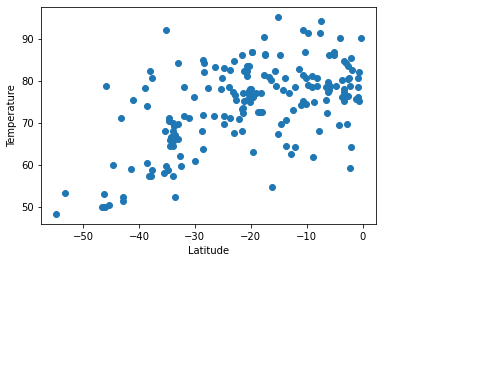

In [19]:
#Southern Hemisphere - Temperature vs. Latitude Linear Regression
x_values = southern_df["Latitude"]
y_values = southern_df["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

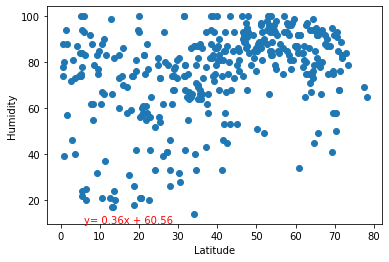

In [20]:
#Northern Hemishere - Humidity vs. Latitude Linear Regression
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

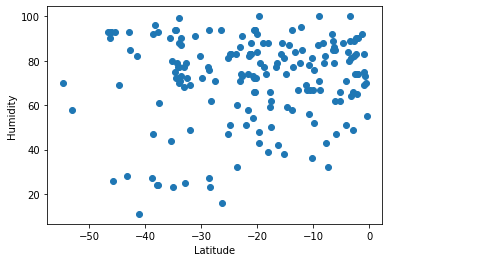

In [21]:
#Southern Hemishere - Humidity vs. Latitude Linear Regression
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

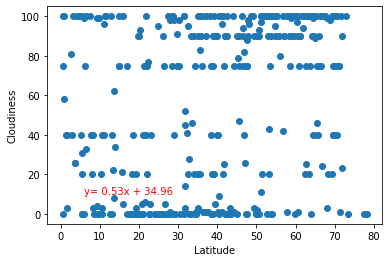

In [22]:
#Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

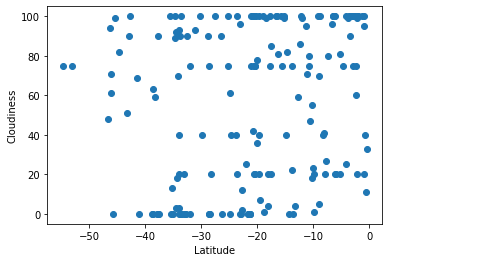

In [23]:
#Southern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

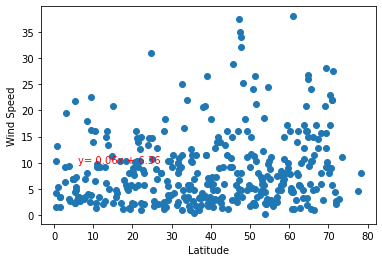

In [24]:
#Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = northern_df["Latitude"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

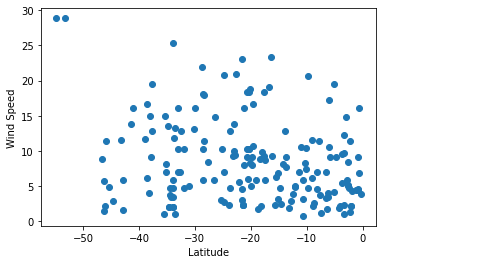

In [25]:
#Southern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = southern_df["Latitude"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()